19/19 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 1799491385.0710628
R^2 Score: 0.7755558930762362


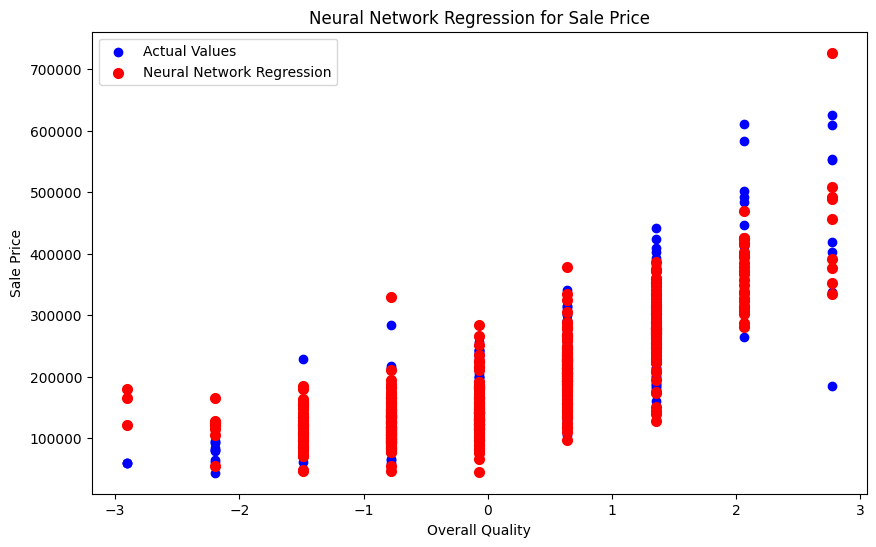

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset
data = pd.read_csv('https://raw.githubusercontent.com/MaxxML2023/ML2023/main/AmesHousing.csv')

# Select features and target variable for regression
X = data[['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Total Bsmt SF', 'Gr Liv Area']]
y = data['SalePrice']

# Handling missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and compile the neural network model for regression
model = Sequential([
    Dense(units=64, input_shape=(X.shape[1],), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the regression model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Values')
plt.scatter(X_test[:, 0], y_pred, color='red', linewidth=2, label='Neural Network Regression')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.legend()
plt.title('Neural Network Regression for Sale Price')
plt.show()




7/7 [==============================] - 0s 6ms/step
Accuracy: 93.00%


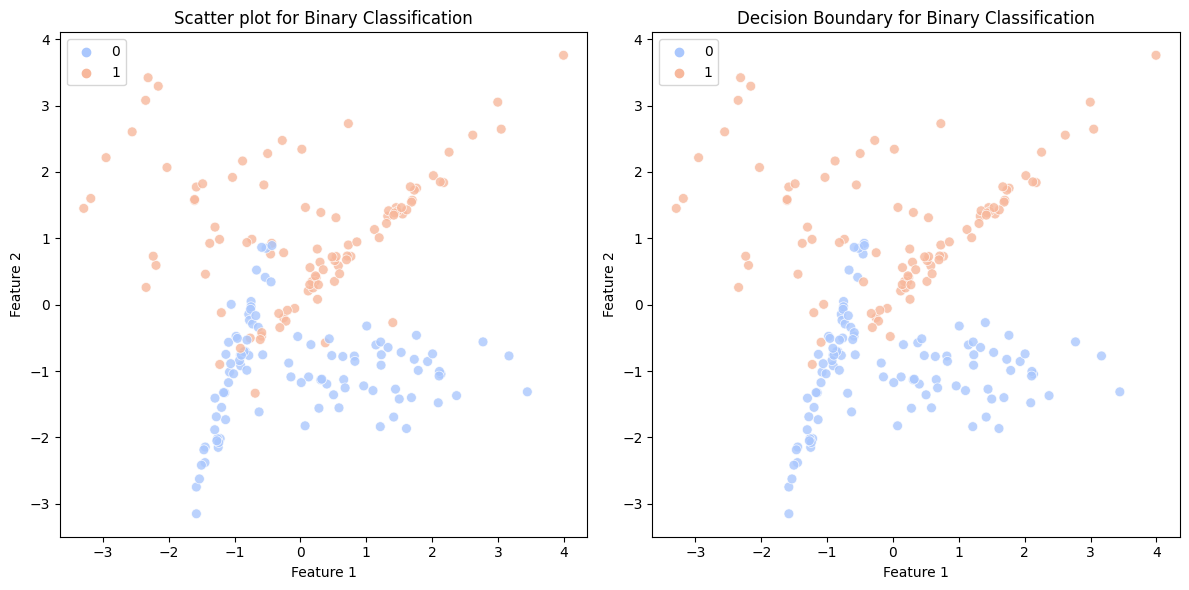

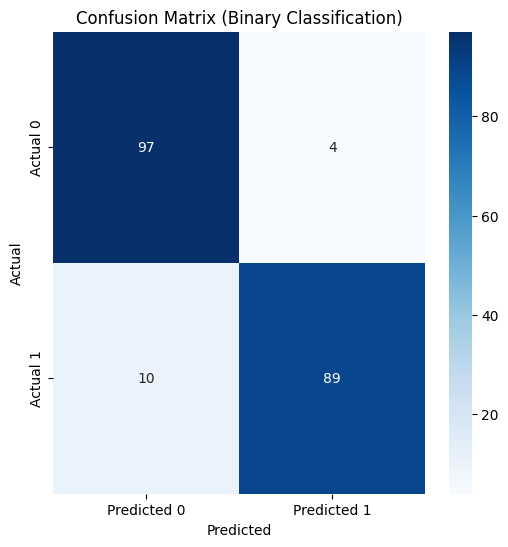

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a sequential neural network model for binary classification
model = Sequential([
    Dense(units=64, input_shape=(2,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluate the classification accuracy on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the scatter plot and decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='coolwarm', s=50, alpha=0.8)
plt.title('Scatter plot for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred.flatten(), palette='coolwarm', s=50, alpha=0.8)
plt.title('Decision Boundary for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Binary Classification)')
plt.show()
